# Apache Flink Performance Evaluation

## Yahoo Benchmark Log Analysis

### Parallelism vs. Average Latency

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [35]:
def get_sum_throughput(filename, window_size_ms): 
    seen_records = np.loadtxt(filename, dtype=int)
    return np.sum(seen_records)

def get_avg_latency(filename, window_size_ms):
    update_times = np.loadtxt(filename, dtype=int)
    filtered_times = [x - window_size_ms for x in update_times if x >= window_size_ms]
    return np.average(filtered_times)

def get_filtered_updated(filename, window_size_ms):
    update_times = np.loadtxt(filename, dtype=int)
    filtered_times = [x - window_size_ms for x in update_times if x >= window_size_ms]
    return filtered_times

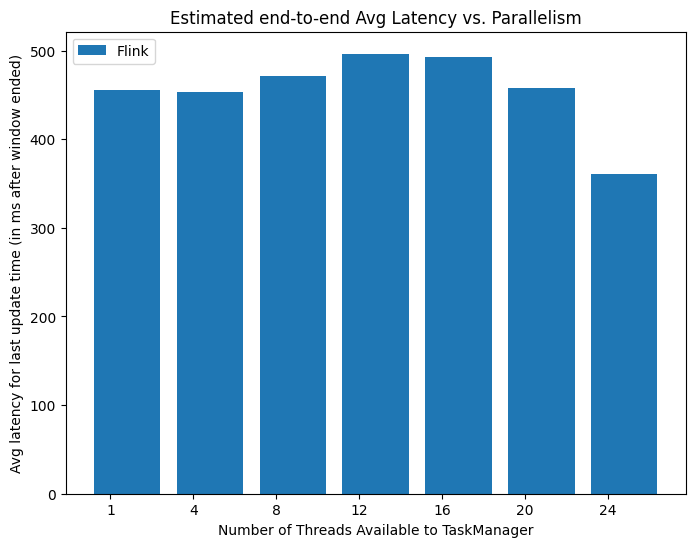

In [4]:
window_size_ms = 10000  # 10 seconds, hard set in {java file path} ...
flink_files = [
        ("/Users/vishalyathish/Documents/CS214/project_data_0306/parallelism-1/updated.txt"),
        # ("/Users/vishalyathish/Documents/CS214/project_data/parallelism-1B/updated.txt"),
        ("/Users/vishalyathish/Documents/CS214/project_data_0306/parallelism-4/updated.txt"),
        # ("/Users/vishalyathish/Documents/CS214/project_data/parallelism-4B/updated.txt"),
        ("/Users/vishalyathish/Documents/CS214/project_data_0306/parallelism-8/updated.txt"),
        # ("/Users/vishalyathish/Documents/CS214/project_data/parallelism-8B/updated.txt"),
        ("/Users/vishalyathish/Documents/CS214/project_data_0306/parallelism-12/updated.txt"),
        ("/Users/vishalyathish/Documents/CS214/project_data_0306/parallelism-16/updated.txt"),
        ("/Users/vishalyathish/Documents/CS214/project_data_0306/parallelism-20/updated.txt"),
        ("/Users/vishalyathish/Documents/CS214/project_data_0306/parallelism-24/updated.txt")
]
avg_latency_flink = [get_avg_latency(filename, window_size_ms) for filename in flink_files]
legend=['Flink']

labels = ["1", "4", "8", "12", "16", "20", "24"]
f = plt.figure(num=None, figsize=(8, 6))
plt.xticks(range(len(avg_latency_flink)), labels)

plt.bar(np.arange(len(avg_latency_flink)) + 0.2, avg_latency_flink, width =0.8)

plt.xlabel('Number of Threads Available to TaskManager')
plt.ylabel('Avg latency for last update time (in ms after window ended)')
plt.title('Estimated end-to-end Avg Latency vs. Parallelism')
plt.legend(legend, loc=2)
plt.show()

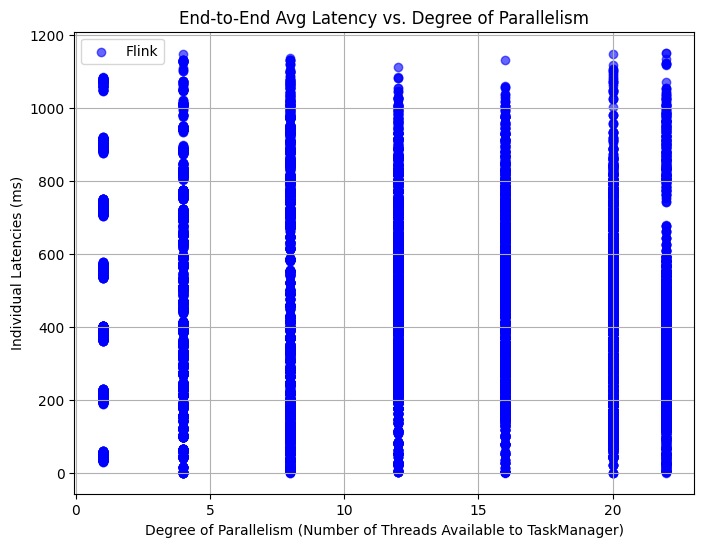

In [5]:
parallelism_labels = [1, 4, 8, 12, 16, 20, 22, 23, 24]

def get_individual_latencies(filename, window_size_ms):
    update_times = np.loadtxt(filename, dtype=int)
    filtered_times = [x - window_size_ms for x in update_times if x >= window_size_ms]
    return filtered_times

latencies_flink = []
for filename in flink_files:
    latencies_flink.extend(get_individual_latencies(filename, window_size_ms))

latency_parallelism_pairs = []
for i, filename in enumerate(flink_files):
    file_latencies = get_individual_latencies(filename, window_size_ms)
    parallelism = parallelism_labels[i]  # Get the degree of parallelism for this file
    latency_parallelism_pairs.extend([(latency, parallelism) for latency in file_latencies])
latencies, parallelism = zip(*latency_parallelism_pairs)
f = plt.figure(num=None, figsize=(8, 6))
plt.scatter(parallelism, latencies, color='blue', label='Flink', alpha=0.6)

plt.xlabel('Degree of Parallelism (Number of Threads Available to TaskManager)')
plt.ylabel('Individual Latencies (ms)')
plt.title('End-to-End Avg Latency vs. Degree of Parallelism')

plt.grid(True)

plt.legend()
plt.show()

**NOTE**: There does not appear to be strong correlation between the number of available theads to the TaskManager and the end-to-end latencies as measured by the benchmark (the time written to Redis - the time emmitted into Kafka); future experiments however matched the number of Kafka partitions to the number of available threads. We also note that the Yahoo Benchmark source code provides no mechanism for separating out the ingestion and write latencies from the actual Flink processing latency.

### Parallism vs. Latencies Across Loads

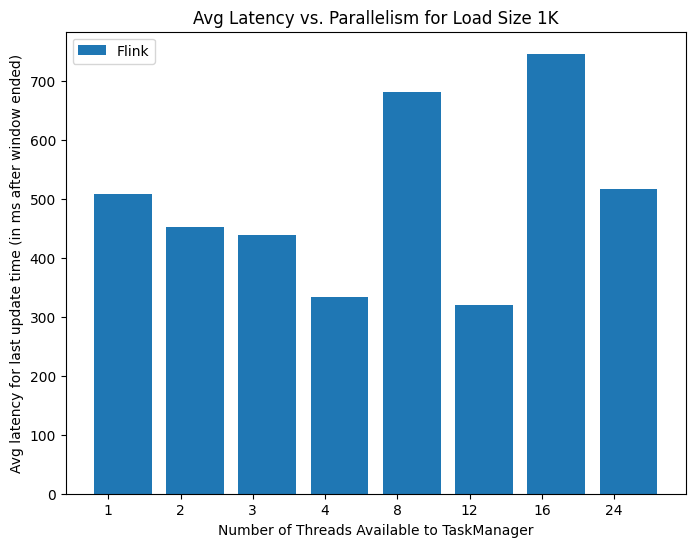

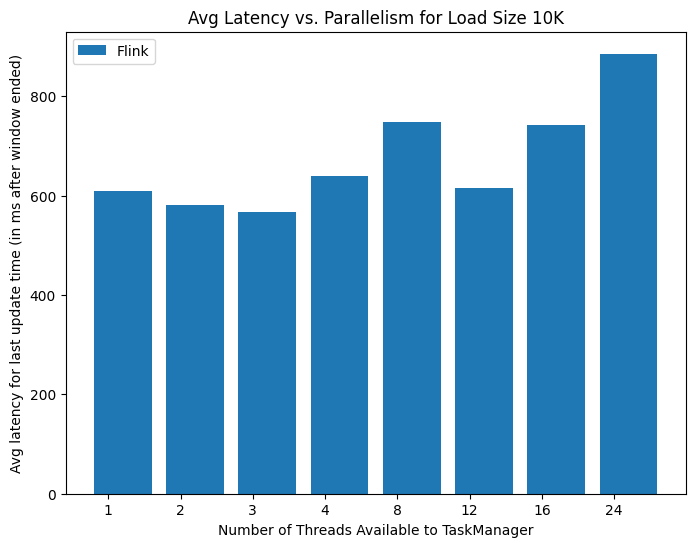

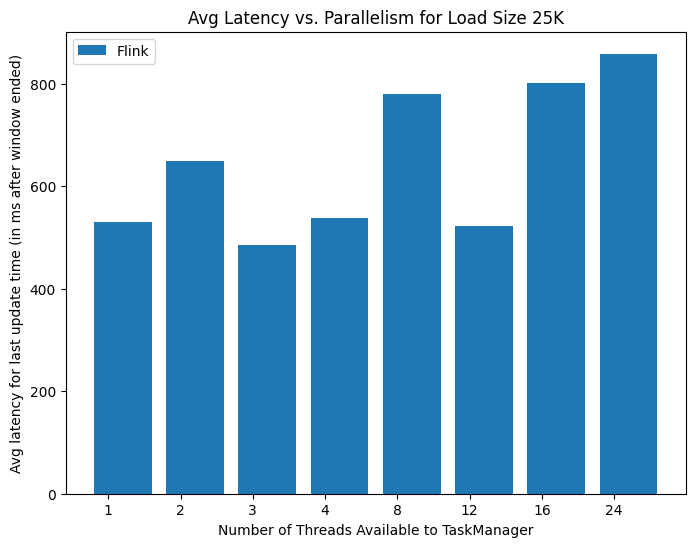

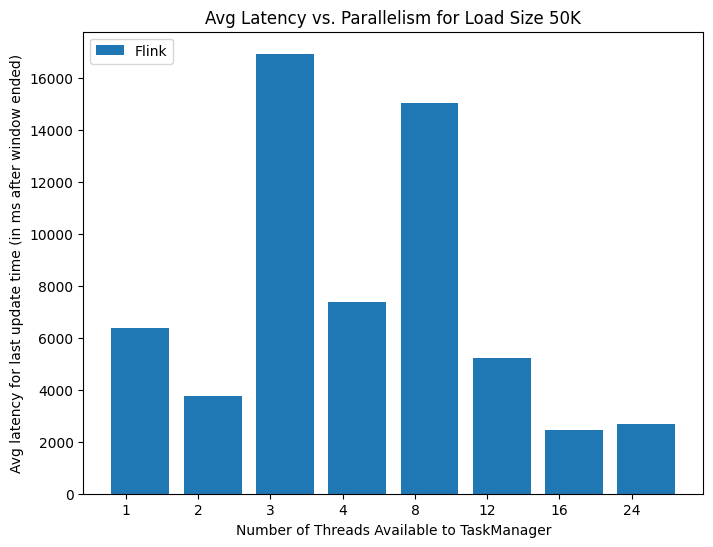

/var/folders/14/bg61t2611w91s5zcw1299lfw0000gn/T/ipykernel_71812/2380660355.py:2: UserWarning: loadtxt: input contained no data: "/Users/vishalyathish/Documents/CS214/project_data_0309/load-100k/p1/updated.txt"
  update_times = np.loadtxt(filename, dtype=int)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


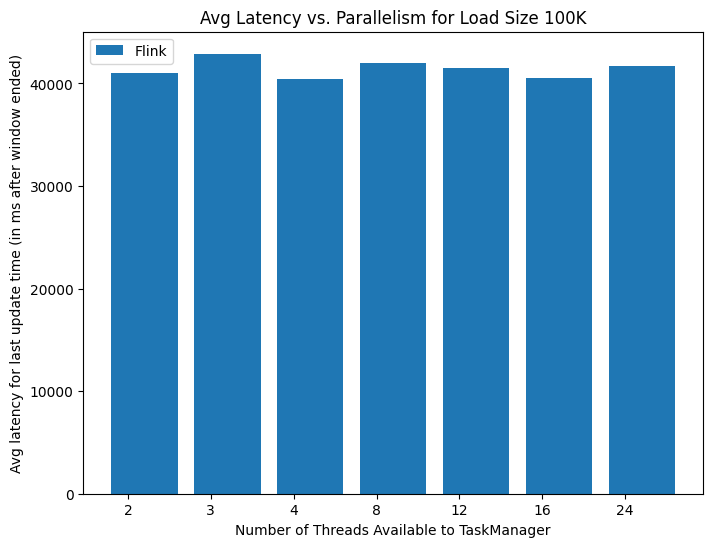

In [25]:
window_size_ms = 10000  # 10 seconds, hard set in {java file path} ...

loads = ["1k", "10k", "25k", "50k", "100k"]
parallelism = ["p1", "p2", "p3", "p4", "p8", "p12", "p16", "p24"]

flink_files = {}
for l in loads: 
    flink_files[l] = []
    for p in parallelism: 
        flink_files[l].append((f"/Users/vishalyathish/Documents/CS214/project_data_0309/load-{l}/{p}/updated.txt"))

for l in loads:     
        avg_latency_flink = [get_avg_latency(filename, window_size_ms) for filename in flink_files[l]]
        legend=['Flink']

        labels = ["1", "2", "3", "4", "8", "12", "16", "24"]
        f = plt.figure(num=None, figsize=(8, 6))
        plt.xticks(range(len(avg_latency_flink)), labels)

        plt.bar(np.arange(len(avg_latency_flink)) + 0.2, avg_latency_flink, width =0.8)

        plt.xlabel('Number of Threads Available to TaskManager')
        plt.ylabel('Avg latency for last update time (in ms after window ended)')
        plt.title(f'Avg Latency vs. Parallelism for Load Size {l.upper()}')
        plt.legend(legend, loc=2)
        plt.show()

## (Parallelism, Load Size) vs. Avg. Latency

In [12]:
import seaborn as sns

/var/folders/14/bg61t2611w91s5zcw1299lfw0000gn/T/ipykernel_71812/1708660038.py:6: UserWarning: loadtxt: input contained no data: "/Users/vishalyathish/Documents/CS214/project_data_0309/load-100k/p1/updated.txt"
  update_times = np.loadtxt(filename, dtype=int)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


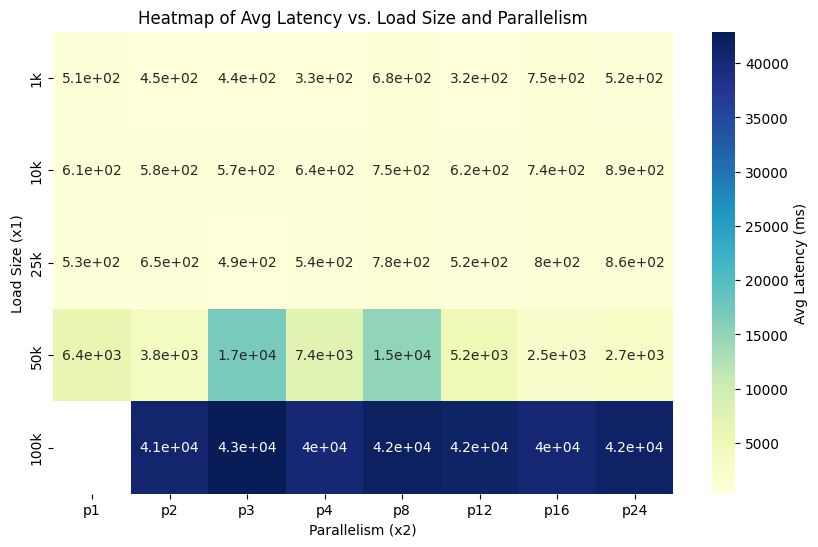

In [39]:
latency_data = []
for l in loads:
    avg_latency_flink = [get_avg_latency(filename, window_size_ms) for filename in flink_files[l]]
    latency_data.append(avg_latency_flink)

latency_data = np.array(latency_data)

plt.figure(figsize=(10, 6))
sns.heatmap(latency_data, annot=True, cmap="YlGnBu", xticklabels=parallelism, yticklabels=loads, cbar_kws={'label': 'Avg Latency (ms)'})

plt.ylabel('Load Size (x1)')
plt.xlabel('Parallelism (x2)')
plt.title('Heatmap of Avg Latency vs. Load Size and Parallelism')

plt.show()

## (Parallelism, Load Size) vs. Egress (Data Written at Pipeline End)

/var/folders/14/bg61t2611w91s5zcw1299lfw0000gn/T/ipykernel_71812/1708660038.py:2: UserWarning: loadtxt: input contained no data: "/Users/vishalyathish/Documents/CS214/project_data_0309/load-100k/p1/seen.txt"
  seen_records = np.loadtxt(filename, dtype=int)


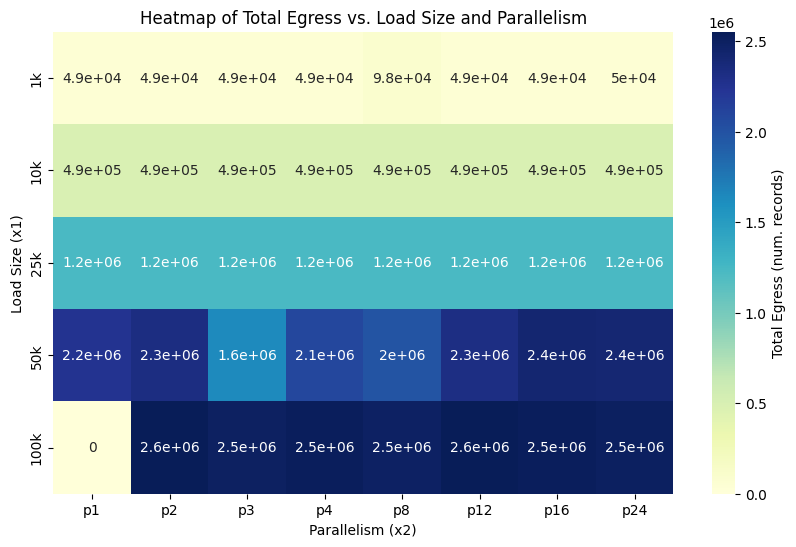

In [40]:
seen_files = {}
for l in loads: 
    seen_files[l] = []
    for p in parallelism: 
        seen_files[l].append((f"/Users/vishalyathish/Documents/CS214/project_data_0309/load-{l}/{p}/seen.txt"))

egress_data = []
for l in loads:
    total_seen = [get_sum_throughput(filename, window_size_ms) for filename in seen_files[l]]
    egress_data.append(total_seen)

egress_data = np.array(egress_data)

plt.figure(figsize=(10, 6))
sns.heatmap(egress_data, annot=True, cmap="YlGnBu", xticklabels=parallelism, yticklabels=loads, cbar_kws={'label': 'Total Egress (num. records)'})

plt.ylabel('Load Size (x1)')
plt.xlabel('Parallelism (x2)')
plt.title('Heatmap of Total Egress vs. Load Size and Parallelism')

plt.show()

## (Parallelism, Load Size) vs. Throughput (Output/Time)

/var/folders/14/bg61t2611w91s5zcw1299lfw0000gn/T/ipykernel_71812/1708660038.py:2: UserWarning: loadtxt: input contained no data: "/Users/vishalyathish/Documents/CS214/project_data_0309/load-100k/p1/seen.txt"
  seen_records = np.loadtxt(filename, dtype=int)


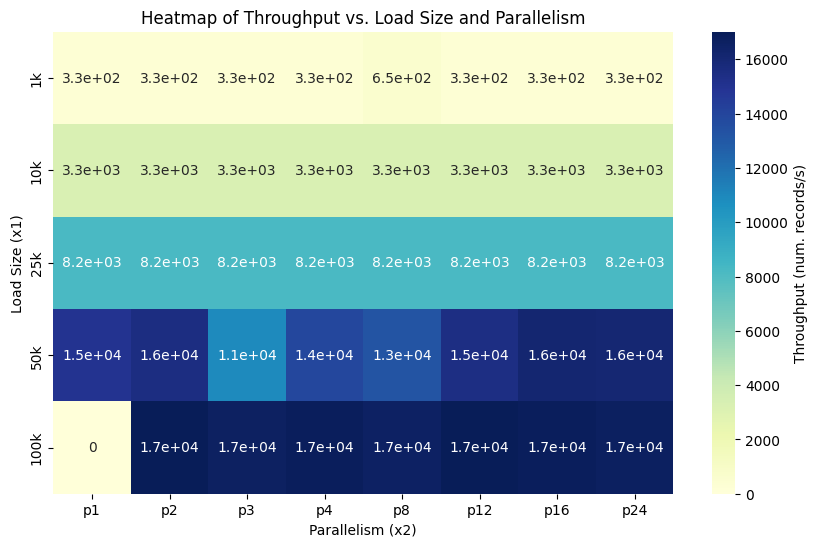

In [41]:
throughput_data = []
for l in loads:
    total_seen = [(get_sum_throughput(filename, window_size_ms)/150) for filename in seen_files[l]]
    throughput_data.append(total_seen)

throughput_data = np.array(throughput_data)

plt.figure(figsize=(10, 6))
sns.heatmap(throughput_data, annot=True, cmap="YlGnBu", xticklabels=parallelism, yticklabels=loads, cbar_kws={'label': 'Throughput (num. records/s)'})

plt.ylabel('Load Size (x1)')
plt.xlabel('Parallelism (x2)')
plt.title('Heatmap of Throughput vs. Load Size and Parallelism')

plt.show()